# antBot Highway World Dataset Creation
Including image extraction, converting colour space, downsampling, saving as `PyTorch Tensor`.

In [101]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as P
import seaborn as sns
import cv2

# Plotting settings
sns.set_context("notebook", font_scale = 1.5)
sns.set_style("dark")
sns.set_palette("deep", 12)
from ipywidgets import interact, interactive, fixed, interact_manual
cmap='Greys_r'

In [155]:
# Image Operations
Images = np.load('../data/2000-10.npy')
print(Images.shape)

(200, 720, 150, 3)


## Inspect Images Captured in the World

In [156]:
# %matplotlib widget
@interact(i=(0,len(Images)-1))
def plot(i=0):
    P.figure(figsize=(16,9))
    P.imshow(np.moveaxis(Images[i],0,1))
    P.title(f'Place {i}')

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

## Image Operations
Convert images to gray, downsample, differentiate between one another

### Utility Functions

In [150]:
RGB2GRAY   = lambda img: cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2GRAY) # img is NumPy array, hence, `.astype(np.uint8)` is required for NumPy to CV2.
DOWNSAMPLE = lambda img, h, w: cv2.resize(img, (h, w),interpolation = cv2.INTER_AREA) # downsamples `img` to `(h,w)` height and width using interpolation
IMAGEOP    = lambda img, h, w: DOWNSAMPLE(RGB2GRAY(img),h,w)
IDF        = lambda img1, img2: np.sqrt(np.sum((img1-img2)**2)/np.prod(img1.shape))
CORCOEF    = lambda img1, img2: np.sum((img1-np.mean(img1))*(img2-np.mean(img2)))/(np.sqrt(np.sum((img1-img1.mean())**2))*np.sqrt(np.sum((img2-img2.mean())**2)))

def getAllIDF(Images, h, w):
    imgIDF = np.zeros((len(Images),len(Images)))
    for i,i1 in enumerate(Images):
        for j,i2 in enumerate(Images):
            img1 = IMAGEOP((i1),h,w)
            img2 = IMAGEOP((i2),h,w)
            imgIDF[i,j] = IDF(img1,img2)
    return imgIDF

def getAllCORCOEF(Images, h, w):
    imgCORCOEF = np.zeros((len(Images),len(Images)))
    for i,i1 in enumerate(Images):
        for j,i2 in enumerate(Images):
            img1 = IMAGEOP((i1),h,w)
            img2 = IMAGEOP((i2),h,w)
            imgCORCOEF[i,j] = CORCOEF(img1,img2)
    return imgCORCOEF

### Example Image

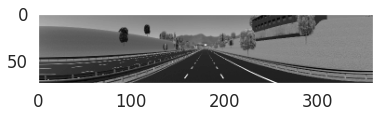

In [157]:
img = IMAGEOP((Images[0]),75,360)
P.imshow(img.T,cmap=cmap)

### IDF and CORCOEF as Heatmap for the Whole Dataset

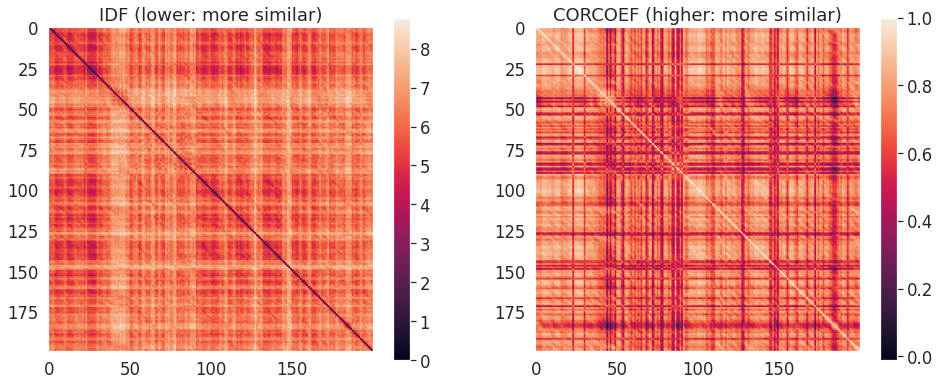

In [158]:
imgIDF = getAllIDF(Images, h=10, w=36)
imgCORCOEF = getAllCORCOEF(Images, h=10, w=36)

fig, ax = P.subplots(1,2,figsize=(16,9))
p1=ax[0].imshow(imgIDF);
ax[0].set_title('IDF (lower: more similar)')
fig.colorbar(p1, ax=ax[0], shrink=0.7)
p2=ax[1].imshow(imgCORCOEF);
ax[1].set_title('CORCOEF (higher: more similar)')
fig.colorbar(p2, ax=ax[1], shrink=0.7);
# P.savefig('./figs/IDF-CORCOEF.png')